In [ ]:
pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [ ]:
#importing the dataset and exploring it
from google.colab import files
uploaded = files.upload()

Saving march19_publish.csv to march19_publish (1).csv


Shape of your Data Set: (1014022, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    6 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Since Number of Rows in data 1014022 exceeds maximum, randomly sampling 150000 rows for EDA...


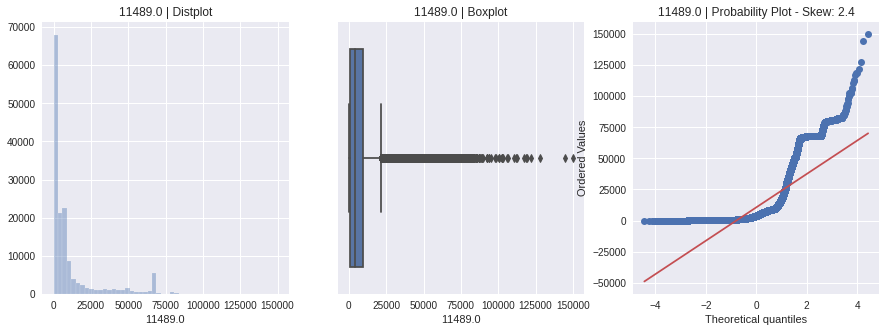

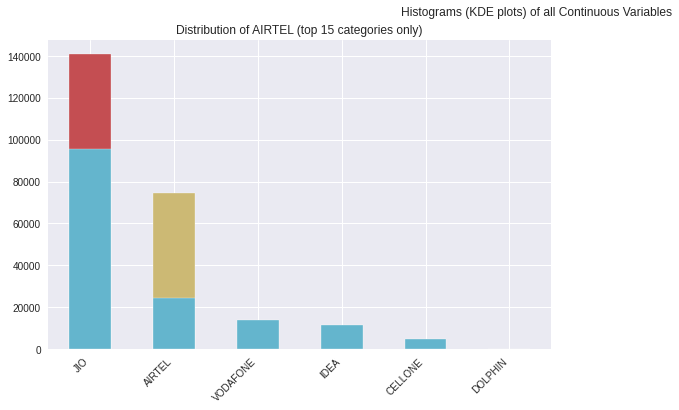

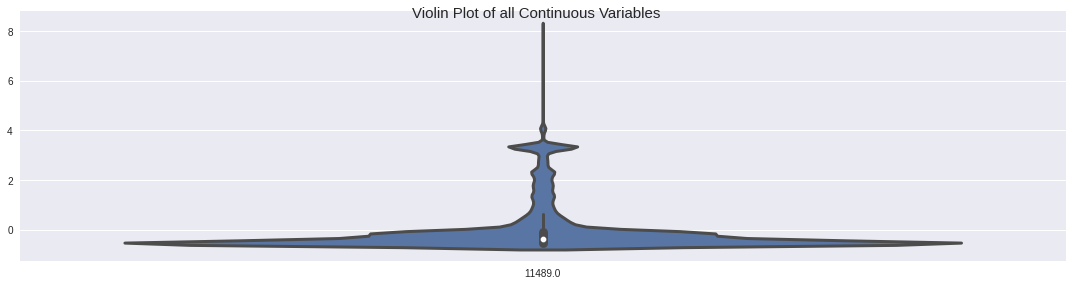

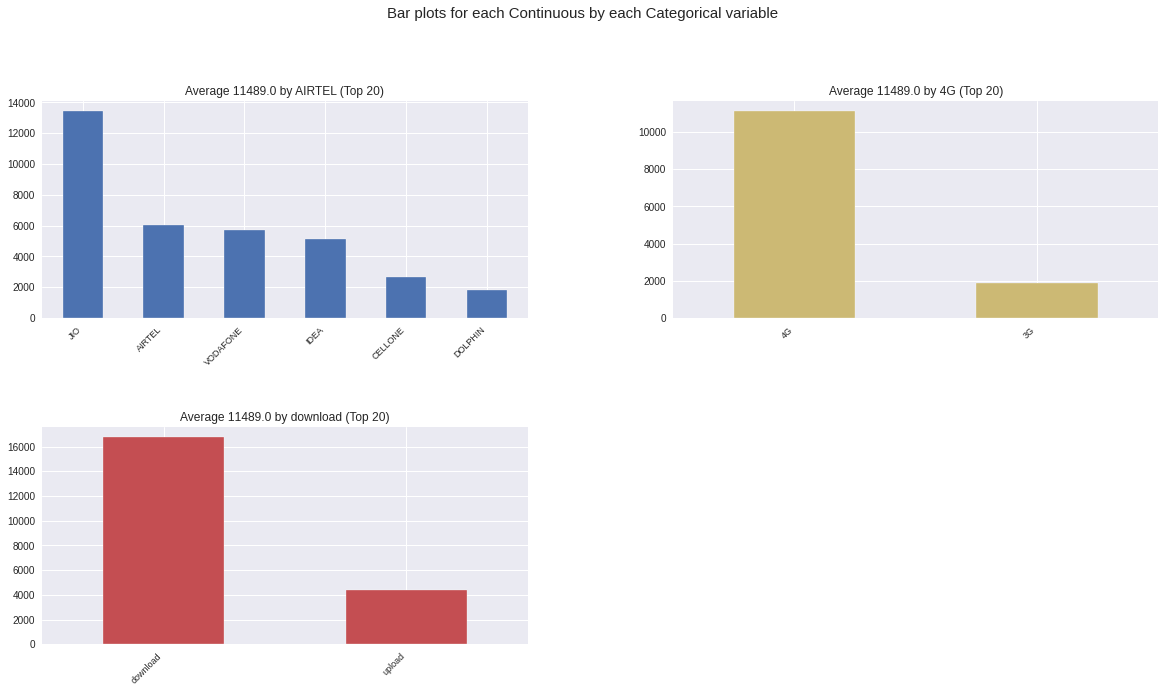

Time to run AutoViz (in seconds) = 7.462

 ###################### VISUALIZATION Completed ########################


In [ ]:
df=AV.AutoViz("march19_publish.csv")

In [ ]:
pip install dtale

     |████████████████████████████████| 14.4MB 274kB/s 
     |████████████████████████████████| 194kB 50.8MB/s 
     |████████████████████████████████| 1.8MB 42.9MB/s 
     |████████████████████████████████| 79.9MB 50kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 13.2MB 44.4MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 645kB 44.2MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 358kB 24.8MB/s 
     |████████████████████████████████| 1.0MB 46.5MB/s 
     |████████████████████████████████| 3.5MB 28.4MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 1.8MB 34.4MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=f7a2eb32435c6d2415a22413592bd2af8f122c1b80dd28bf6bd22ba905e23665
  Stored in d

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
#importing the dataset and exploring it
from google.colab import files
uploaded = files.upload()

Saving march19_publish.csv to march19_publish.csv


In [ ]:
df =pd.read_csv("march19_publish.csv")

In [ ]:
df
df.head()

,Service Provider,Technology,Test_type,Data Speed(Mbps),Signal_strength,LSA
0,AIRTEL,4G,download,11489,-104,Kerala
1,AIRTEL,4G,download,36306,-98,Kerala
2,AIRTEL,4G,download,41058,-98,Kerala
3,AIRTEL,4G,download,55448,-97,Kerala
4,JIO,4G,download,67418,-65,Kerala


In [ ]:
import dtale

In [ ]:
dtale.show(df)

2021-05-05 18:52:07,840 - INFO     - NumExpr defaulting to 2 threads.


http://d38ca9c87585:40000/dtale/main/1

In [ ]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

dtale.show(df)

https://2as58zbbapr-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/3

In [ ]:


import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)


df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['Service Provider'])]['Service Provider']
chart = pd.value_counts(s).to_frame(name='data')
ordinal_data = df.groupby('Service Provider')[['Data Speed(Mbps)']].sum()
chart['ordinal'] = ordinal_data
chart.index.name = 'labels'
chart = chart.reset_index().sort_values('ordinal')
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
charts.append(go.Scatter(
	x=chart['labels'].values, y=chart['ordinal'].values, yaxis='y2',
	name='Data Speed(Mbps) (sum)', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Service Provider Value Counts'},
    'xaxis': {'title': {'text': 'Service Provider'}},
    'yaxis': {'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Data Speed(Mbps) (sum)'}}
}))

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
figure

From the Above Graph Jio leads the month of March 2019 with a Data Speed of 8.681143B mbps which is then followed by Airtel which is approximately 0.992715B Data Speed 

In [ ]:

import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)


df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['Technology'])]['Technology']
chart = pd.value_counts(s).to_frame(name='data')
ordinal_data = df.groupby('Technology')[['Data Speed(Mbps)']].sum()
chart['ordinal'] = ordinal_data
chart.index.name = 'labels'
chart = chart.reset_index().sort_values('ordinal')
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
charts.append(go.Scatter(
	x=chart['labels'].values, y=chart['ordinal'].values, yaxis='y2',
	name='Data Speed(Mbps) (sum)', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Technology Value Counts'},
    'xaxis': {'title': {'text': 'Technology'}},
    'yaxis': {'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Data Speed(Mbps) (sum)'}}
}))

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
figure

The Number of 3G users Have fallen even further due to big Progress developed by 4G with a Data Speed 10.57255B Mbps 

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)


df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['Test_type'])]['Test_type']
chart = pd.value_counts(s).to_frame(name='data')
ordinal_data = df.groupby('Test_type')[['Data Speed(Mbps)']].sum()
chart['ordinal'] = ordinal_data
chart.index.name = 'labels'
chart = chart.reset_index().sort_values('ordinal')
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
charts.append(go.Scatter(
	x=chart['labels'].values, y=chart['ordinal'].values, yaxis='y2',
	name='Data Speed(Mbps) (sum)', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Test_type Value Counts'},
    'xaxis': {'title': {'text': 'Test_type'}},
    'yaxis': {'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Data Speed(Mbps) (sum)'}}
}))
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
figure

Frequency Basically Decides the usage which almost the same for both Speed wise for Downloaded is higher (8.45B mbps) than Uploaded (2.23B mbps)

In [ ]:

import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)


df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['LSA'])]['LSA']
chart = pd.value_counts(s).to_frame(name='data')
ordinal_data = df.groupby('LSA')[['Data Speed(Mbps)']].sum()
chart['ordinal'] = ordinal_data
chart.index.name = 'labels'
chart = chart.reset_index().sort_values('ordinal')
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
charts.append(go.Scatter(
	x=chart['labels'].values, y=chart['ordinal'].values, yaxis='y2',
	name='Data Speed(Mbps) (sum)', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'LSA Value Counts'},
    'xaxis': {'title': {'text': 'LSA'}},
    'yaxis': {'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Data Speed(Mbps) (sum)'}}
}))


In [ ]:
figure

Maximum LSA Value Counts was recorded in UP East with a Data Speed of 1.2650B mbps and Himachal Pradesh Data Speed of 51.23B mbps.

Inferences from the Month Of March_19

From the Above Graph Jio leads the month of March 2019 with a Data Speed of 8.681143B mbps which is then followed by Airtel which is approximately 0.992715B Data Speed

The Number of 3G users Have fallen even further due to big Progress developed by 4G with a Data Speed 10.57255B Mbps.

Frequency Basically Decides the usage which almost the same for both Speed wise for Downloaded is higher (8.45B mbps) than Uploaded (2.23B mbps).

Maximum LSA Value Counts was recorded in UP East with a Data Speed of 1.2650B mbps and Himachal Pradesh Data Speed of 51.23B mbps.


